<!--COURSE_INFORMATION-->
*This notebook contains course material from 
[CBE 20255 Introduction to Chemical Engineering Analysis](http://jckantor.github.io/CBE20255/) 
by Jeffrey Kantor (jeff at nd.edu); the content is available [on GitHub](https://github.com/jckantor/CBE20255).
The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode),
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


<!--NAVIGATION-->
< [Vapor/Liquid Equilibrium](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/07.00-Vapor-Liquid-Equilibrium.ipynb) | [Contents](index.ipynb) | [Vapor-Liquid Equilibrium for Pure Components](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/07.02-Vapor-Liquid-Equilibrium-for-Pure-Components.ipynb) >
<p><a href="https://colab.research.google.com/github/jckantor/CBE20255/blob/master/notebooks/07.01-Gases-with-One-Condensable-Component.ipynb">
<img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


# Gases with One Condensable Component

## Example: Boiling Water

One Saturday afternoon, while distracted by other things, you put room temperature tap water into a tea kettle and place it on to the stove to boil. Like most tea kettles, this one has a spout with a one-way valve that releases any vapor produced during boiling, so the absolute pressure inside the tea kettle is always one atmosphere.

<img align="middle" src="https://slimages.macysassets.com/is/image/MCY/products/3/optimized/2990463_fpx.tif?op_sharpen=1&wid=1230&hei=1500&fit=fit,1&$filterxlrg$" width="200"/>

(a.) Sketch a plot of kettle temperture as a function of time. Are there transitions in the slope of this plot? Though you don't have enough information for a completely detailed plot, do indicate any numbers that you can.

(b.) Sketch the vapor pressure of water as a function of time. Again, be as quantitative as possible.

### Solution

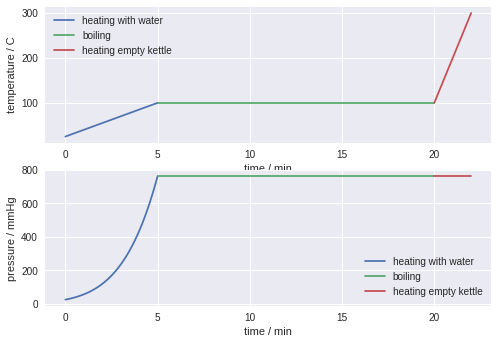

In [2]:
# Antoine equation for water
def Psat(T):
  return 10**(8.10765 - 1750.286/(T + 235.0))

# plot construction
import matplotlib.pyplot as plt
import numpy as np

ta = np.linspace(0,5)
Ta = 25 + 15*ta
Pa = Psat(Ta)

tb = np.linspace(5,20)
Tb = 100 + 0*(tb-5)
Pb = Psat(Tb)

tc = np.linspace(20,22)
Tc = 100 + 100*(tc-20)
Pc = Pb

plt.subplot(2,1,1)
plt.plot(ta, Ta, tb, Tb, tc, Tc)
plt.legend(['heating with water','boiling','heating empty kettle'])
plt.xlabel('time / min')
plt.ylabel('temperature / C')

plt.subplot(2,1,2)
plt.plot(ta, Pa, tb, Pb, tc, Pc)
plt.legend(['heating with water','boiling','heating empty kettle'])
plt.xlabel('time / min')
plt.ylabel('pressure / mmHg');

## Example: Partial Condensation

You suddenly remember that you left a tea kettle on the stove to boil. You rush over to the stove and luckily catch it in the nick of time.  There is still a small amount of liquid water left, and steam is still being discharged from the spout. Yy this time all air in the kettle has been discharged. 

You take tea kettle off the stove and let it cool to the room temperature (25$^\circ$C). The kettle has an internal volume of 2 liters. You estimate the contents of the kettle has a mass of just 4g.

a.) What is the pressure inside of the cool tea kettle?

b.) What is the mass of liquid water remaining inside of the kettle?

### Part (a) Solution

In [3]:
# Antoine equation for water
def Psat(T):
  return 10**(8.10765 - 1750.286/(T + 235.0))

T = 25
print('Pressure inside the cool tea kettle =', Psat(T), 'mmHg')

Pressure inside the cool tea kettle = 23.756407663704227 mmHg


### Part (b) Solution

There are two unknowns in part b. -- the mass of the liquid $m_{liq}$ and the mass of the vapor $m_{vap}$. There are also two pieces of information -- the total mass of 4 grams and the total volume of 2 liters. Denoted the molar volume as $\hat{V}_{liq}$ and $\hat{V}_{vap}$, respectively, the equations read

\begin{align*}
m_{liq} + m_{vap} & = m_{total} \\
\frac{m_{liq}}{M} \hat{V}_{liq} + \frac{m_{vap}}{M} \hat{V}_{vap}  & = V_{total}
\end{align*}

where $M$ is molecular weight. 

For the liquid, the $\hat{V}_{liq}/M$ is just $1/\rho$ where $\rho$ is the liquid density, 1000 g/liter. For the vapor, the molar volume is given by the ideal gas law

\begin{equation}
\hat{V}_{vap} = \frac{R T}{P}
\end{equation}

Doing some algebra

\begin{equation}
m_{liq} = \frac{\frac{RT}{PM}m_{total} - V_{total}}{\frac{RT}{PM} - \frac{1}{\rho}}
\end{equation}

In [17]:
# Antoine equation for water
def Psat(T):
  return 10**(8.10765 - 1750.286/(T + 235.0))

# problem data
R = 0.08206        # liter-atm/(K-gmol)
T = 25             # temperature C
P = Psat(T)/760.0  # atm
M = 18.01          # molecular mass
rho = 1000.0       # grams/liter
Vtotal = 2         # total volume
mtotal = 4         # total mass

# algebraic solutin
Vmass = R*T/(P*M)
mliq = (Vmass*4 - 2)/(Vmass - 1/rho)
mvap = mtotal - mliq

print('\nAlgebraic Solution:')
print('Mass of liquid =', mliq, 'grams')
print('Mass of vapor =', mvap, 'grams')

# check the solution using sympy
from sympy import *
var('m_liq m_vap')
eqns = [
    Eq(m_liq + m_vap, 4),
    Eq(m_liq/rho + (R*T/P)*m_vap/M, 2)
]

print('\nSolution using Sympy: ')
print(solve(eqns))


Algebraic Solution:
Mass of liquid = 3.4521153928077695 grams
Mass of vapor = 0.5478846071922305 grams

Solution using Sympy: 
{m_liq: 3.45211539280777, m_vap: 0.547884607192231}


## Example: Relative Humidity

Before the tea-making fiasco the air in the kitchen was a pleasant 25$^\circ$C with a relative humidity of 40%. You estimate the ill-fated attempt at tea-making released a half liter of water into a room encompassing 20 square meters with a ceiling height of 2.75 meters. What is the relative humidity after the release of the water vapor?

### Solution

Relative humidity is defined as
\begin{equation}
RH = \frac{y_AP}{P^{sat}_A(T)}
\end{equation}

The solution strategy is to 

1. use the ideal gas law to determine how much water is present, in moles, at the start,
2. add the moles generated during the boiling operation to compute a final composition, 
3. compute the final relative humidity from the above equation.

In [ ]:
T = 25             # deg C
P = 760            # mmHg
R = 0.08206        # liter-atm/(gmol-K)
V = 1000*20*2.75   # liters

RH = 0.4

yH2O = RH*Psat(T)/P
print(' initial water mole fraction =', yH2O)


n = (P/760)*V/(R*(T+273.15))
print('         Total initial moles =', n, 'gmols')

nH2O = yH2O*n
print('      Initial moles of water =', nH2O, 'gmole')

nH2O = nH2O + 500/MW
print('        Final moles of water =', nH2O, 'gmole')

yH2O = nH2O/(n + nH2O)
print('Final mole fraction of water =', yH2O)

print('           Relative humidity =', 100*yH2O*P/Psat(T), '%')

pH2O_25 = yH2O*P
print('   partial pressure of water =', pH2O, 'mmHg')

## Example: Dew Point

It was a cool evening, and you wake to a kitchen at 15$^\circ$C with a covering of dew on the inside of the windows. Assuming there was no ventilation following your tea-making adventure, how much water condensed on the windows?  What will be the relative humidity once the room is back to a daytime temperture of 25$^\circ$C?

### Solution

In [ ]:
pH2O_15 = Psat(15)

print('initial partial pressure of water =', pH2O_25, 'mmHg')
print('  final partial pressure of water =', pH2O_15, 'mmHg')

nH2O_25 = (pH2O_25/760)*V/(R*(T + 273.15))
nH2O_15 = (pH2O_15/760)*V/(R*(T + 273.15))

print('initial amount of water =', nH2O_25*MW, 'grams')
print('  final amount of water =', nH2O_15*MW, 'gmoles')
print('        condensed water =', nH2O_25*MW - nH2O_15*MW, 'grams')

print(' final relative humidity =', 100*pH2O_15/Psat(25), '%')

<!--NAVIGATION-->
< [Vapor/Liquid Equilibrium](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/07.00-Vapor-Liquid-Equilibrium.ipynb) | [Contents](index.ipynb) | [Vapor-Liquid Equilibrium for Pure Components](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/07.02-Vapor-Liquid-Equilibrium-for-Pure-Components.ipynb) >
<p><a href="https://colab.research.google.com/github/jckantor/CBE20255/blob/master/notebooks/07.01-Gases-with-One-Condensable-Component.ipynb">
<img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>
